# **Logistic Regression**

In [ ]:
#reading dataset from google drive
from google.colab import drive
drive.mount("/content/drive")#clicking the link and copy the authorization codes
#%cd /content/drive/"My Drive"/cis522/"Face Mask Dataset"

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
import torch.optim as optim
import torch.nn as nn
from torch.nn import functional as F
warnings.filterwarnings('ignore')

### **Data Pre-processing for Logistic Regression**

In [ ]:
train_withmask = '/content/drive/My Drive/cis522/Face Mask Dataset/Train/WithMask'
train_nomask= '/content/drive/My Drive/cis522/Face Mask Dataset/Train/WithoutMask'
val_withmask = '/content/drive/My Drive/cis522/Face Mask Dataset/Validation/WithMask'
val_nomask= '/content/drive/My Drive/cis522/Face Mask Dataset/Validation/WithoutMask'
test_withmask= '/content/drive/My Drive/cis522/Face Mask Dataset/Test/WithMask'
test_nomask= '/content/drive/My Drive/cis522/Face Mask Dataset/Test/WithoutMask'
image_size = 32

(-0.5, 31.5, 31.5, -0.5)

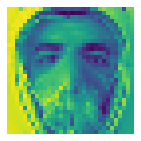

In [ ]:
# Greyscale the images
path = os.path.join(train_withmask, '10.png')
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
img = cv2.resize(img, (image_size, image_size)).flatten()   
np_img=np.asarray(img)
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')

In [ ]:
# Data Tranformation
def train_data():
    train_data_mask = [] 
    train_data_nomask=[]
    for image1 in tqdm(os.listdir(train_withmask)): 
      try:
        path = os.path.join(train_withmask, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size)).flatten()
        img1 = np.asarray(img1)
        train_data_mask.append(img1) 
      except cv2.error:
        continue
    for image2 in tqdm(os.listdir(train_nomask)): 
      try:
        path = os.path.join(train_nomask, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size)).flatten()
        img2 = np.asarray(img2)
        train_data_nomask.append(img2) 
      except cv2.error:
        print("error")
        continue
    train_data_mask = np.asarray(train_data_mask)
    train_data_nomask = np.asarray(train_data_nomask)
    np.savetxt(r"/content/drive/My Drive/cis522/Face Mask Dataset/train_mask.csv", train_data_mask, delimiter=",")
    np.savetxt(r"/content/drive/My Drive/cis522/Face Mask Dataset/train_nomask.csv", train_data_nomask, delimiter=",")

def val_data():
    val_data_mask = [] 
    val_data_nomask=[]
    for image1 in tqdm(os.listdir(val_withmask)): 
      try:
        path = os.path.join(val_withmask, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size)).flatten()
        img1 = np.asarray(img1)
        val_data_mask.append(img1) 
      except cv2.error:
        continue
    for image2 in tqdm(os.listdir(val_nomask)): 
      try:
        path = os.path.join(val_nomask, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size)).flatten()
        img2 = np.asarray(img2)
        val_data_nomask.append(img2) 
      except cv2.error:
        continue
    val_data_mask = np.asarray(val_data_mask)
    val_data_nomask = np.asarray(val_data_nomask)
    np.savetxt(r"/content/drive/My Drive/cis522/Face Mask Dataset/val_mask.csv", val_data_mask, delimiter=",")
    np.savetxt(r"/content/drive/My Drive/cis522/Face Mask Dataset/val_nomask.csv", val_data_nomask, delimiter=",")

def test_data():
    test_data_mask = [] 
    test_data_nomask=[]
    for image1 in tqdm(os.listdir(test_withmask)): 
      try:
        path = os.path.join(test_withmask, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size)).flatten()
        img1 = np.asarray(img1)
        test_data_mask.append(img1) 
      except cv2.error:
        continue
    for image2 in tqdm(os.listdir(test_nomask)): 
      try:
        path = os.path.join(test_nomask, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size)).flatten()
        img2 = np.asarray(img2)
        test_data_nomask.append(img2) 
      except cv2.error:
        continue
    test_data_mask = np.asarray(test_data_mask)
    test_data_nomask = np.asarray(test_data_nomask)
    np.savetxt(r"/content/drive/My Drive/cis522/Face Mask Dataset/test_mask.csv", test_data_mask, delimiter=",")
    np.savetxt(r"/content/drive/My Drive/cis522/Face Mask Dataset/test_nomask.csv", test_data_nomask, delimiter=",")

In [ ]:
# Transform original data
train_data()
val_data()
test_data()

In [ ]:
# Tranformed Data Loading
train_mask = np.asarray(pd.read_csv('/content/drive/My Drive/cis522/Face Mask Dataset/train_mask.csv', header=None))
train_nomask = np.asarray(pd.read_csv('/content/drive/My Drive/cis522/Face Mask Dataset/train_nomask.csv', header=None))
val_mask = np.asarray(pd.read_csv('/content/drive/My Drive/cis522/Face Mask Dataset/val_mask.csv', header=None))
val_nomask = np.asarray(pd.read_csv('/content/drive/My Drive/cis522/Face Mask Dataset/val_nomask.csv', header=None))
test_mask = np.asarray(pd.read_csv('/content/drive/My Drive/cis522/Face Mask Dataset/test_mask.csv', header=None))
test_nomask = np.asarray(pd.read_csv('/content/drive/My Drive/cis522/Face Mask Dataset/test_nomask.csv', header=None))

In [ ]:
# Create train and test sets
# 0 stands for wearing a mask, 1 stands for not wearing a mask
cnt_train = [train_mask.shape[0] + val_mask.shape[0], train_nomask.shape[0] + val_nomask.shape[0]]
cnt_test = [test_mask.shape[0], test_nomask.shape[0]]
X_train = np.concatenate((train_mask, val_mask, train_nomask, val_nomask), axis=0)
X_test = np.concatenate((test_mask, test_nomask), axis=0)
y_train = np.concatenate((np.zeros(cnt_train[0]), np.ones(cnt_train[1]))).reshape(-1,1)
y_test = np.concatenate((np.zeros(cnt_test[0]), np.ones(cnt_test[1]))).reshape(-1,1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Data Normalization
X_norm = StandardScaler().fit_transform(np.concatenate((X_train, X_test), axis=0))
X_train_norm = X_norm[:X_train.shape[0]]
X_test_norm = X_norm[X_train.shape[0]:]

# Data training and testing
clf = LogisticRegression().fit(X_train_norm, y_train)
print("train accuracy is: " + str(clf.score(X_train_norm, y_train)))
print("test accuracy is: " + str(clf.score(X_test_norm, y_test)))

train accuracy is: 0.9162037037037037
test accuracy is: 0.8770161290322581


## **Import Dataset for CNN Methods**

In [ ]:
import torch
import numpy as np
import torchvision.transforms as transforms
from torchvision import models
import torchvision
import torch.nn as nn
import multiprocessing as mp
from tqdm.notebook import tqdm, trange
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([
                    #transforms.CenterCrop(100),
                    transforms.Resize([32,32]), #resize images
                    transforms.ToTensor(),     
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Comment 1 : Load the datasets with ImageFolder
image_datasets_train = torchvision.datasets.ImageFolder(root= '/content/drive/My Drive/cis522/Face Mask Dataset/Train', transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloaders_train = torch.utils.data.DataLoader(image_datasets_train, batch_size=128, shuffle=True, num_workers=mp.cpu_count(), pin_memory=True)

# Comment 1 : Load the datasets with ImageFolder
image_datasets_test = torchvision.datasets.ImageFolder(root= '/content/drive/My Drive/cis522/Face Mask Dataset/Test', transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloaders_test = torch.utils.data.DataLoader(image_datasets_test, batch_size=128, shuffle=True, num_workers=mp.cpu_count(), pin_memory=True)

# Comment 1 : Load the datasets with ImageFolder
image_datasets_val = torchvision.datasets.ImageFolder(root= '/content/drive/My Drive/cis522/Face Mask Dataset/Validation', transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloaders_val = torch.utils.data.DataLoader(image_datasets_val, batch_size=128, shuffle=True, num_workers=mp.cpu_count(), pin_memory=True)

In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'drive', 'sample_data']


In [ ]:
image_datasets_train

Dataset ImageFolder
    Number of datapoints: 10000
    Root location: /content/drive/My Drive/cis522/Face Mask Dataset/Train
    StandardTransform
Transform: Compose(
               Resize(size=[32, 32], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

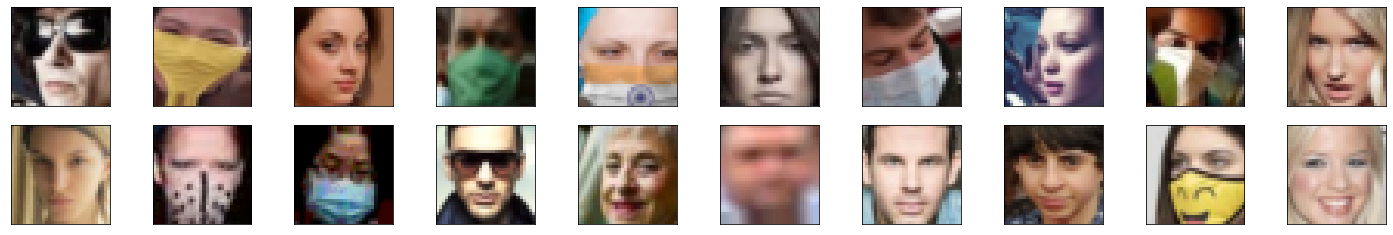

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
    
dataiter = iter(dataloaders_val)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [ ]:
i1, l1 = next(iter(dataloaders_val))
print(torch.unique(l1))
#0: with mask
#1: no mask

tensor([0, 1])


In [ ]:
i1.shape

torch.Size([128, 3, 32, 32])

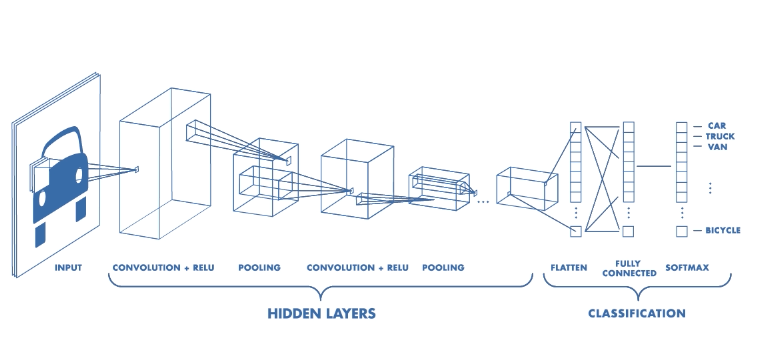

In [ ]:
#Device setting
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# **Vanilla CNN**

In [ ]:
#Classic CNN Architecture
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential( #(3,32,32)
            nn.Conv2d(
                in_channels = 3, 
                out_channels = 16,
                kernel_size = 3,
                stride = 1),# ->(16,30,30)
            nn.ReLU(),
            nn.MaxPool2d(2),# ->(16,15,15)
            nn.Conv2d(
                in_channels = 16, 
                out_channels = 32,
                kernel_size = 3,
                stride = 1),#->(32,13,13)
            nn.ReLU(),
            nn.MaxPool2d(2)#->(32,6,6)
        )

        self.fc = nn.Sequential(
            nn.Linear(1152,128),
            nn.Linear(128,2)  
         )
    def forward(self, x):
        
        x = self.features(x)
        x = torch.flatten(x, 1)
        output=self.fc(x)
        return output

In [ ]:
pip install -U ray

     |████████████████████████████████| 51.6 MB 39 kB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 65 kB 4.5 MB/s 
     |████████████████████████████████| 1.3 MB 51.9 MB/s 
     |████████████████████████████████| 127 kB 73.3 MB/s 
     |████████████████████████████████| 3.1 MB 54.5 MB/s 
     |████████████████████████████████| 10.1 MB 52.9 MB/s 
     |████████████████████████████████| 72 kB 711 kB/s 
     |████████████████████████████████| 142 kB 59.3 MB/s 
     |████████████████████████████████| 294 kB 69.9 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-py3-none-any.whl size=12617 sha256=ea74b100ac911dcbc2a45a2581fd9d65c6aa9183971037355bac1da96b00d2c6
  Stored in directory: /root/.cache/pip/wheels/e6/67/af/f1ad15974b8fd95f59a63dbf854483ebe5c7a46a93930798b8
Successfully built gpustat


In [ ]:
# Training method for Vanilla CNN
from ray import tune
def train(model, device, train_loader, validation_loader, epochs, criterion, optimizer):
    train_loss, validation_loss = [], []
    train_acc, validation_acc = [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.
        correct, total = 0, 0 

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            data, target = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            output = model(data)
                
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
                # get accuracy 
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        train_loss.append(running_loss/len(train_loader))
        train_acc.append(correct/total) 

        model.eval()
        running_loss = 0.
        correct, total = 0, 0 
        for i, data in enumerate(validation_loader, 0):
            inputs, labels = data
            data, target = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(data)
                
            loss = criterion(output, target)

            running_loss += loss.item()


            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        
        validation_loss.append(running_loss/len(validation_loader))
        validation_acc.append(correct/total)
    return train_loss,train_acc, validation_loss, validation_acc 

In [ ]:
# Test method for vanilla CNN
def test(model, device, data_loader):
    model.eval()
    correct = 0
    total = 0
    label = []
    for data in data_loader:
        inputs, labels = data
        inputs = inputs.to(device).float()
        labels = labels.to(device).long()

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        label.append(labels.cpu())
        acc = 100 * correct / total

    return acc,inputs,predicted,label

In [ ]:
pip install tensorboardX

     |████████████████████████████████| 124 kB 7.6 MB/s 


### **hyperparameter tuning**

In [ ]:
#DONT RUN here
import torch.optim as optim
from ray import tune

def get_data_loaders(batchsize):
  dataloaders_train = torch.utils.data.DataLoader(image_datasets_train, batch_size=batchsize, shuffle=True, num_workers=mp.cpu_count(), pin_memory=True)
  dataloaders_val = torch.utils.data.DataLoader(image_datasets_val, batch_size=batchsize, shuffle=True, num_workers=mp.cpu_count(), pin_memory=True)
  return dataloaders_train, dataloaders_val

def train_mnist(config):
    use_cuda = config.get("use_gpu") and torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')
    train_loader, val_loader = get_data_loaders(config["batchsize"])
    model = CNN().to(device)
    optimizer = optim.SGD(model.parameters(), lr=config["lr"])
    criterion=nn.CrossEntropyLoss()
    epoch = config["epoch"]
    train_loss, train_acc, validation_loss, validation_acc  = train(model, device, train_loader, val_loader, epoch, criterion, optimizer)
    acc = validation_acc[-1]
    tune.report(mean_accuracy=acc)


analysis = tune.run(
    train_mnist,resources_per_trial={"cpu": 2, "gpu": 0.5}, config={"lr": tune.grid_search([0.01, 0.1]),"batchsize": tune.grid_search([100, 300]),"epoch": tune.grid_search([20, 50, 80])})

print("Best config: ", analysis.get_best_config(metric="mean_accuracy",mode="max"))

# Get a dataframe for analyzing trial results.
df = analysis.dataframe()

Trial name,status,loc,batchsize,epoch,lr
train_mnist_d43af_00000,PENDING,,100,20,0.01
train_mnist_d43af_00001,PENDING,,300,20,0.01
train_mnist_d43af_00002,PENDING,,100,50,0.01
train_mnist_d43af_00003,PENDING,,300,50,0.01
train_mnist_d43af_00004,PENDING,,100,80,0.01
train_mnist_d43af_00005,PENDING,,300,80,0.01
train_mnist_d43af_00006,PENDING,,100,20,0.1
train_mnist_d43af_00007,PENDING,,300,20,0.1
train_mnist_d43af_00008,PENDING,,100,50,0.1
train_mnist_d43af_00009,PENDING,,300,50,0.1


(raylet) /usr/local/lib/python3.7/dist-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /usr/local/lib/python3.7/dist-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)


Trial name,status,loc,batchsize,epoch,lr
train_mnist_d43af_00000,RUNNING,,100,20,0.01
train_mnist_d43af_00001,PENDING,,300,20,0.01
train_mnist_d43af_00002,PENDING,,100,50,0.01
train_mnist_d43af_00003,PENDING,,300,50,0.01
train_mnist_d43af_00004,PENDING,,100,80,0.01
train_mnist_d43af_00005,PENDING,,300,80,0.01
train_mnist_d43af_00006,PENDING,,100,20,0.1
train_mnist_d43af_00007,PENDING,,300,20,0.1
train_mnist_d43af_00008,PENDING,,100,50,0.1
train_mnist_d43af_00009,PENDING,,300,50,0.1


2021-07-20 18:40:07,805	WARNING tune.py:507 -- SIGINT received (e.g. via Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C one more time (or send SIGINT/SIGKILL/SIGTERM) to skip. 


KeyboardInterrupt: ignored

### **Train and Test the vanilla CNN**

In [ ]:
net2 = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net2.parameters(),lr=0.1)
train_loader, val_loader = get_data_loaders(100)
num_epochs = 80
train_loss, train_acc, validation_loss, validation_acc = train(net2, device, train_loader, val_loader, num_epochs, criterion, optimizer)

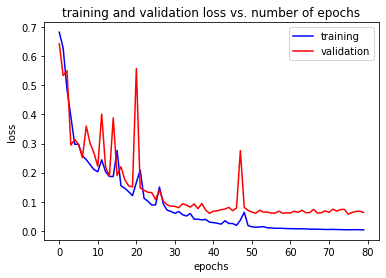

In [ ]:
plt.figure()
plt.plot(train_loss, label='test',color = 'b')
plt.plot(validation_loss, label='validation',color = 'r')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title('training and validation loss vs. number of epochs')
plt.legend()
plt.show()

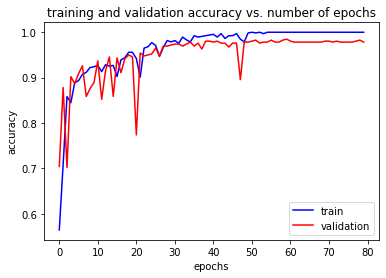

In [ ]:
plt.figure()
plt.plot(train_acc, label='test',color = 'b')
plt.plot(validation_acc, label='validation',color = 'r')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('training and validation accuracy vs. number of epochs')
plt.legend()
plt.show()

In [ ]:
acc,input, pred,label = test(net2, device, dataloaders_test)
acc

96.23217922606925

# **ResNet18 Transfer Learning**

In [ ]:
# Model initialization
net = models.resnet18(pretrained=True)
net = net.cuda() if device else net
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Parametr initialization
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 2)
net.fc = net.fc.cuda() 

In [ ]:
# Training for 10 epochs
n_epochs = 10
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(dataloaders_train)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(dataloaders_train):
        data_, target_ = data_.to(device), target_.to(device)
        optimizer.zero_grad()
        
        outputs = net(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net.eval()
        for data_t, target_t in (dataloaders_val):
            data_t, target_t = data_t.to(device), target_t.to(device)
            outputs_t = net(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t/total_t)
        val_loss.append(batch_loss/len(dataloaders_val))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')

        
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(net.state_dict(), 'resnet.pt')
            print('Improvement-Detected, save-model')
    net.train()

Epoch 1

Epoch [1/10], Step [0/79], Loss: 0.1342
Epoch [1/10], Step [20/79], Loss: 0.0980
Epoch [1/10], Step [40/79], Loss: 0.1114
Epoch [1/10], Step [60/79], Loss: 0.0971

train-loss: 0.1136, train-acc: 96.1800
validation loss: 0.1202, validation acc: 95.6250

Improvement-Detected, save-model
Epoch 2

Epoch [2/10], Step [0/79], Loss: 0.0694
Epoch [2/10], Step [20/79], Loss: 0.1002
Epoch [2/10], Step [40/79], Loss: 0.1397
Epoch [2/10], Step [60/79], Loss: 0.0977

train-loss: 0.1047, train-acc: 96.8900
validation loss: 0.1170, validation acc: 96.0000

Improvement-Detected, save-model
Epoch 3

Epoch [3/10], Step [0/79], Loss: 0.0700
Epoch [3/10], Step [20/79], Loss: 0.0908
Epoch [3/10], Step [40/79], Loss: 0.0606
Epoch [3/10], Step [60/79], Loss: 0.0878

train-loss: 0.0972, train-acc: 97.2600
validation loss: 0.1119, validation acc: 96.5000

Improvement-Detected, save-model
Epoch 4

Epoch [4/10], Step [0/79], Loss: 0.0758
Epoch [4/10], Step [20/79], Loss: 0.0621
Epoch [4/10], Step [40/79

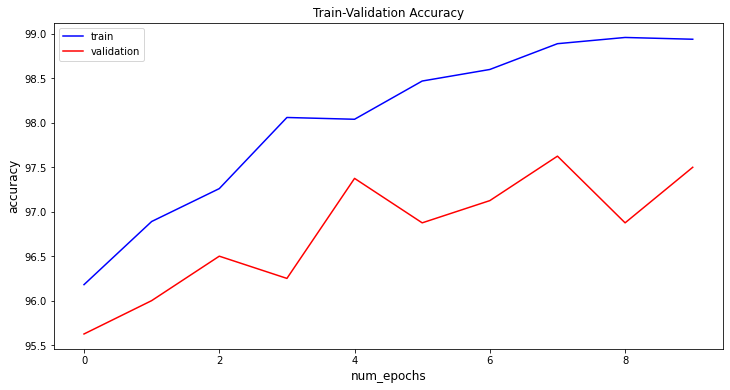

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title("Train-Validation Accuracy")
plt.plot(train_acc, label='train', color='b')
plt.plot(val_acc, label='validation', color='r')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')

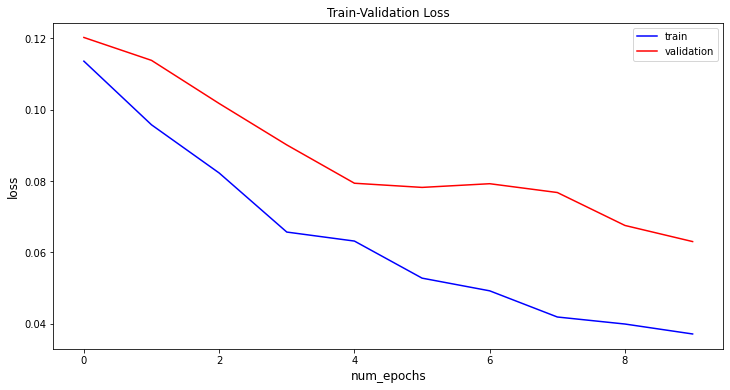

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title("Train-Validation Loss")
plt.plot(train_loss, label='train', color='b')
plt.plot(val_loss, label='validation', color='r')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc='best')

In [ ]:
# Testing method
def test(model, device, data_loader):
    model.eval()
    correct = 0
    total = 0
    label = []
    for data in data_loader:
        inputs, labels = data
        inputs = inputs.to(device).float()
        labels = labels.to(device).long()

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        label.append(labels.cpu())
        acc = 100 * correct / total

    return acc,inputs,predicted,label

In [ ]:
resnet_acc = test(net, device, dataloaders_test)
print("The ResNet gets a test accuracy of %s" %resnet_acc[0])

The ResNet gets a test accuracy of 97.58064516129032
